In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import networkx as nx

In [2]:
df = pd.read_csv('exported_data/normalized_10.df')

In [3]:
datasets = []

for idx, val in df['datasets'].apply(lambda x: sorted(eval(x))).items():
    datasets.extend(val)
    
datasets = list(set(datasets))
print(datasets)

['dennlinger/wiki-paragraphs/validation/embeddings.npy', 'mteb/sts14-sts/test/embeddings.npy', 'mteb/sts13-sts/test/embeddings.npy', 'mteb/stsbenchmark-sts/test/embeddings.npy', 'mteb/sts15-sts/test/embeddings.npy', 'snli/test/embeddings.npy', 'mteb/banking77/test/embeddings.npy', 'mteb/biosses-sts/test/embeddings.npy', 'mteb/sickr-sts/test/embeddings.npy', 'mteb/stsbenchmark-sts/validation/embeddings.npy', 'snli/validation/embeddings.npy', 'mteb/amazon_polarity/test/embeddings.npy', 'mteb/sts12-sts/test/embeddings.npy']


In [4]:
df.head()

Unnamed: 0                                    id                 date  \
0           0  cd7482ea-f50d-48dd-85f1-8df5741d8c3c  2024-04-06 19:42:09   
1           0  18ab44d8-9adc-4c99-8429-7f57cd40fe06  2024-04-06 18:13:00   
2           0  592e63fb-7946-4a9c-93c5-c330d1a33cbe  2024-04-06 19:32:18   
3           0  52701ad4-2dc9-4331-a49d-b46c51b186da  2024-04-06 21:14:51   
4           0  eb716082-2bd3-498b-9689-d717d73038ca  2024-04-06 19:40:38   

                               model_1  \
0       ../output/croissantllm/base_5k   
1       ../output/intfloat/e5-large-v2   
2         ../output/google/gemma-7b-it   
3  ../output/infgrad/stella-base-en-v2   
4     ../output/croissantllm/base_150k   

                                            model_2   d_1   d_2  \
0                  ../output/izhx/udever-bloom-560m  2048  1024   
1  ../output/sentence-transformers/all-MiniLM-L6-v2  1024   384   
2      ../output/sentence-transformers/gtr-t5-large  3072   768   
3                    ../output/croissantllm/base_5k   768  2048   
4                       ../output/intfloat/e5-small  2048   384   

   dataset_filter                                           datasets  \
0             NaN  {'dennlinger/wiki-paragraphs/validation/embedd...   
1             NaN  {'mteb/sts12-sts/test/embeddings.npy', 'snli/t...   
2             NaN  {'mteb/banking77/test/embeddings.npy', 'mteb/s...   
3             NaN  {'mteb/amazon_polarity/test/embeddings.npy', '...   
4             NaN  {'mteb/sickr-sts/test/embeddings.npy', 'mteb/s...   

   I(X_1->X_2)  ...  cond_modes  marg_modes  use_tanh  init_std  \
0   689.371413  ...           8           8      True      0.01   
1   156.392025  ...           8           8      True      0.01   
2   345.194234  ...           8           8      True      0.01   
3  1262.250473  ...           8           8      True      0.01   
4   140.500362  ...           8           8      True      0.01   

   ff_residual_connection ff_activation ff_layer_norm  ff_layers  \
0                   False          relu          True          2   
1                   False          relu          True          2   
2                   False          relu          True          2   
3                   False          relu          True          2   
4                   False          relu          True          2   

   ff_dim_hidden  margin_lr  
0              0     0.0001  
1              0     0.0001  
2              0     0.0001  
3              0     0.0001  
4              0     0.0001  

[5 rows x 36 columns]

In [5]:
df['I(X_1->X_2)/H(X_2)'] = df['I(X_1->X_2)'] / df['H(X_2)']
df['I(X_1->X_2)/d_1'] = df['I(X_1->X_2)'] / df['d_1']
df['I(X_1->X_2)/d_2'] = df['I(X_1->X_2)'] / df['d_2']

df['model_1'] = df['model_1'].apply(lambda x: "/".join(x.split('/')[-2:]))
df['model_2'] = df['model_2'].apply(lambda x: "/".join(x.split('/')[-2:]))




In [6]:
df = df.groupby(['model_1', 'model_2']).first().reset_index()

In [7]:

df = df[~(df['model_1'] == "jinaai/jina-embedding-s-en-v1")]
df = df[~(df['model_2'] == "jinaai/jina-embedding-s-en-v1")]

In [8]:
sns.set_style("whitegrid")
METRIC = 'I(X_1->X_2)/d_2'
# METRIC = 'I(X_1->X_2)/H(X_2)'
# METRIC = 'I(X_1->X_2)'
from matplotlib import patheffects

cmap =sns.color_palette("coolwarm", as_cmap=True)


table = df
table = table[["model_1", "model_2", METRIC]].pivot("model_1", "model_2",METRIC).fillna(0)

# count number of 0 per row
n_0 = table.apply(lambda x: x[x == 0].count(), axis=1)

# count number of 0 per column
n_0_col = table.apply(lambda x: x[x == 0].count(), axis=0)

# remove rows with more than 50% of 0
# table = table[n_0 < table.shape[1] // 2]

# remove columns with more than 50% of 0
# table = table.loc[:, n_0_col < table.shape[0] // 2]

# make square
table = table.loc[table.index.intersection(table.columns)]



# remove lines with only 0

/tmp/ipykernel_77679/61322320.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = table[["model_1", "model_2", METRIC]].pivot("model_1", "model_2",METRIC).fillna(0)


In [9]:
table

model_2                                             BAAI/bge-base-en-v1.5  \
BAAI/bge-base-en-v1.5                                            1.418067   
GritLM/GritLM-7B                                                 0.483868   
HuggingFaceM4/tiny-random-LlamaForCausalLM                       0.049749   
NousResearch/Llama-2-7b-hf                                       0.456766   
Salesforce/SFR-Embedding-Mistral                                 0.527131   
SmartComponents/bge-micro-v2                                     0.445959   
TaylorAI/gte-tiny                                                0.468498   
WhereIsAI/UAE-Large-V1                                           0.000000   
avsolatorio/GIST-Embedding-v0                                    1.267994   
croissantllm/CroissantCool                                       0.440525   
croissantllm/CroissantLLMBase                                    0.433222   
croissantllm/base_100k                                           0.434854   
croissantllm/base_150k                                           0.423541   
croissantllm/base_50k                                            0.430689   
croissantllm/base_5k                                             0.424052   
google/gemma-2b                                                  0.428759   
google/gemma-2b-it                                               0.442327   
google/gemma-7b                                                  0.434304   
google/gemma-7b-it                                               0.468497   
infgrad/stella-base-en-v2                                        0.960711   
intfloat/e5-large-v2                                             0.503200   
intfloat/e5-small                                                0.449534   
intfloat/multilingual-e5-small                                   0.442296   
izhx/udever-bloom-560m                                           0.419937   
jamesgpt1/sf_model_e5                                            0.527286   
jspringer/echo-mistral-7b-instruct-lasttoken                     0.489482   
llmrails/ember-v1                                                0.541861   
princeton-nlp/sup-simcse-bert-base-uncased                       0.456218   
sentence-transformers/LaBSE                                      0.400337   
sentence-transformers/all-MiniLM-L6-v2                           0.425745   
sentence-transformers/all-distilroberta-v1                       0.445739   
sentence-transformers/all-mpnet-base-v2                          0.448786   
sentence-transformers/allenai-specter                            0.313495   
sentence-transformers/average_word_embeddings_g...               0.347742   
sentence-transformers/average_word_embeddings_k...               0.340472   
sentence-transformers/gtr-t5-base                                0.442911   
sentence-transformers/gtr-t5-large                               0.438542   
sentence-transformers/gtr-t5-xl                                  0.441822   
sentence-transformers/msmarco-bert-co-condensor                  0.472047   
sentence-transformers/sentence-t5-large                          0.454824   
sentence-transformers/sentence-t5-xl                             0.456058   
thenlper/gte-base                                                1.106829   
thenlper/gte-large                                               0.529798   

model_2                                             GritLM/GritLM-7B  \
BAAI/bge-base-en-v1.5                                       0.000000   
GritLM/GritLM-7B                                            1.060136   
HuggingFaceM4/tiny-random-LlamaForCausalLM                  0.000000   
NousResearch/Llama-2-7b-hf                                  0.000000   
Salesforce/SFR-Embedding-Mistral                            0.000000   
SmartComponents/bge-micro-v2                                0.000000   
TaylorAI/gte-tiny                                           0.000000   
WhereIsAI/UAE-Large-V1             

In [10]:
def sanitize_metric_name(metric):
    return metric.replace('/', '_').replace(' ', '_').replace('(', '').replace(')', '').replace('->', 'to').replace('(', '').replace(')', '')


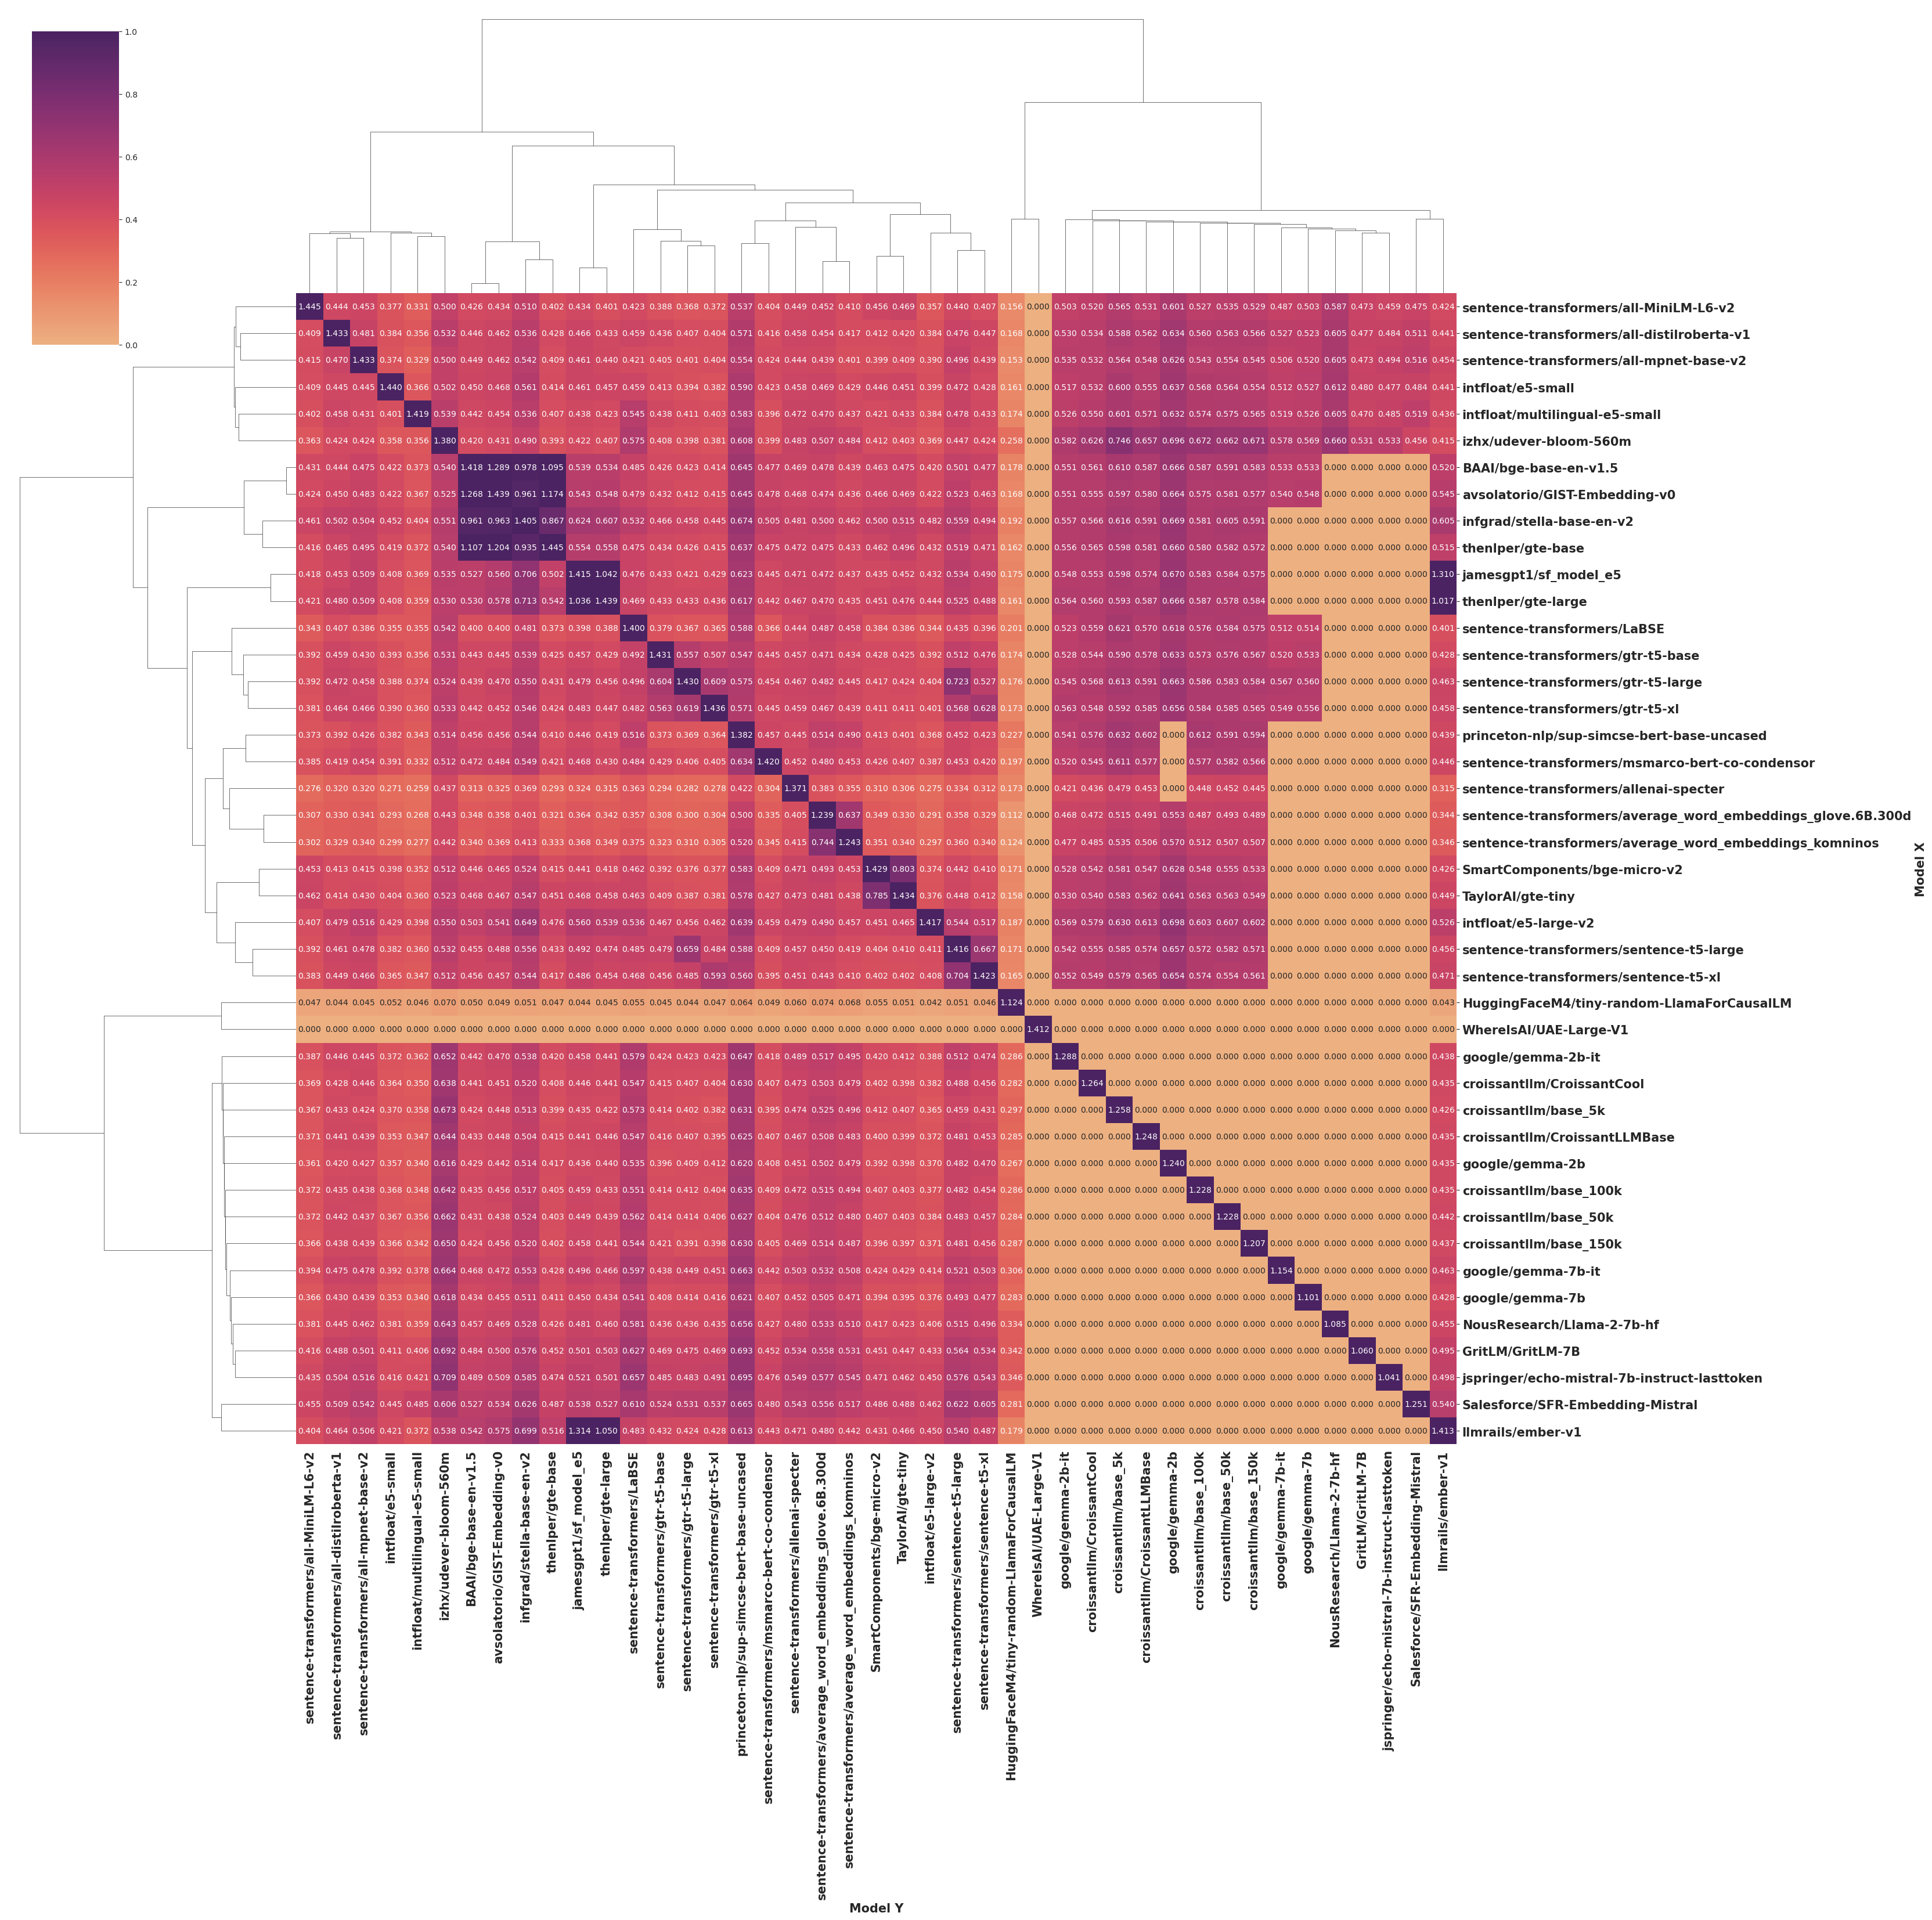

In [29]:
from scipy.cluster.hierarchy import linkage
link = linkage(table, method="ward")

cluster = sns.clustermap(table, row_linkage=link, col_linkage=link, figsize=(30, 30), cmap='flare', annot=True, fmt=".3f", vmax=1)

# make labels bigger and bold and rename in model X and model Y
cluster.ax_heatmap.set_xticklabels(cluster.ax_heatmap.get_xticklabels(), fontsize=15, fontweight='bold')
cluster.ax_heatmap.set_yticklabels(cluster.ax_heatmap.get_yticklabels(), fontsize=15, fontweight='bold')
cluster.ax_heatmap.set_xlabel("Model Y", fontsize=15, fontweight='bold')
cluster.ax_heatmap.set_ylabel("Model X", fontsize=15, fontweight='bold')

path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/mis_graph_clustermap_{sanitize_metric_name(METRIC)}.png")
# make sure the folder exists
path.parent.mkdir(parents=True, exist_ok=True)
cluster.savefig(path, bbox_inches='tight', dpi=300)


In [12]:
# Community detection

from networkx.algorithms.community import greedy_modularity_communities

G = nx.from_pandas_adjacency(table, create_using=nx.DiGraph)
communities = list(greedy_modularity_communities(G))


    
    


/usr/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/mdarrin/.local/lib/python3.11/site-packages/netgraph/_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


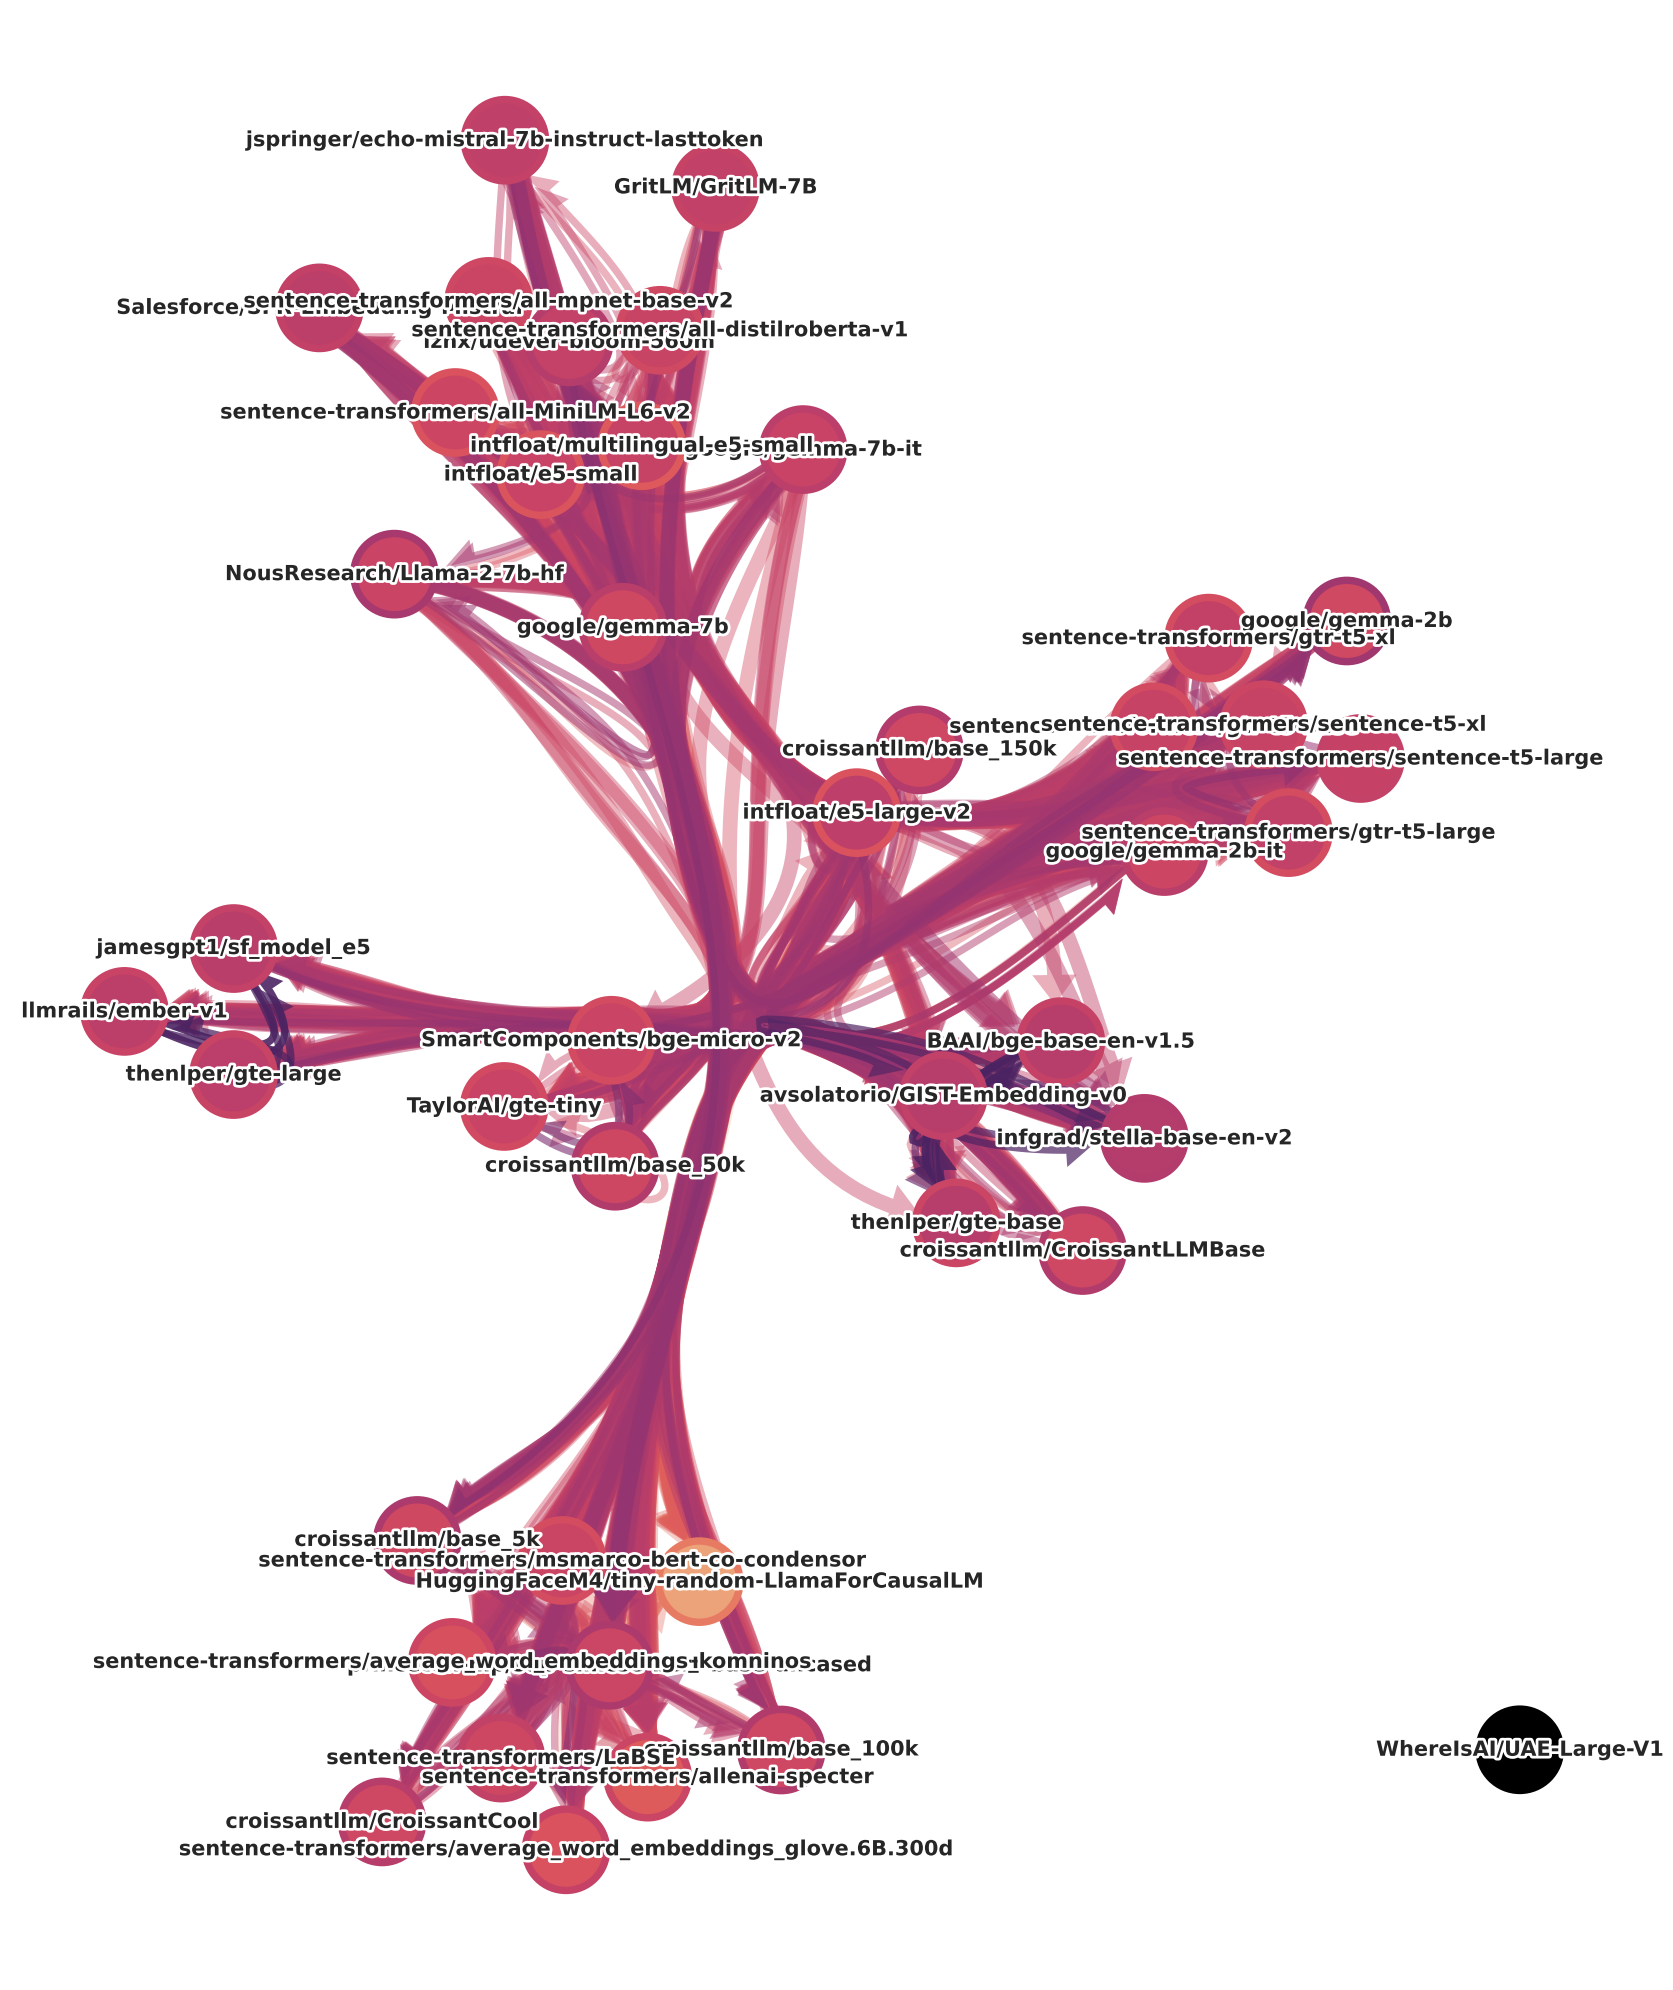

In [13]:
from netgraph import Graph, InteractiveGraph

from networkx.algorithms.community import girvan_newman, modularity_max, louvain_communities

G= nx.from_pandas_adjacency(table, create_using=nx.DiGraph)
G.remove_edges_from(nx.selfloop_edges(G))

communities = louvain_communities(G, resolution=1.1)
communities = list(communities)
# get a discrete color map

cmap = sns.color_palette("flare", as_cmap=True)

avg_weight = {n : np.mean([d[2]['weight'] for d in G.out_edges(n, data=True)]) for n in G.nodes()}
avg_income = {n : np.mean([d[2]['weight'] for d in G.in_edges(n, data=True)]) for n in G.nodes()}

# normalize the average weight

node_to_community = {node: i for i, community in enumerate(communities) for node in community}

# node color using a color map
# node_color = {node: cmap(i) for i, community in enumerate(communities) for node in community}

# make average out going weight the node color
node_color = {node: cmap(avg_weight[node]) for node in G.nodes()}
node_edge_color = {node: cmap(avg_income[node]) for node in G.nodes()}


node_labels = {node: node for node in G.nodes()}

edge_color = {edge: G.edges[edge]['weight'] for edge in G.edges()}
# normalize edge 
edge_color = {edge: cmap(edge_color[edge]) for edge in edge_color}
max_edge = max(e[2]['weight'] for e in G.edges(data=True))


# normalize edge alpha
min_alpha = 0.2
max_alpha = 0.9
edge_alpha = {edge: G.edges[edge]['weight'] for edge in G.edges()}
edge_alpha = {edge: (edge_alpha[edge] - min(edge_alpha.values())) / (max(edge_alpha.values()) - min(edge_alpha.values())) * (max_alpha - min_alpha) + min_alpha for edge in edge_alpha}

# edge width
min_edge_width = 0.3
max_edge_width = 1
edge_width = {edge: G.edges[edge]['weight'] for edge in G.edges()}
edge_width = {edge: (edge_width[edge] - min(edge_width.values())) / (max(edge_width.values()) - min(edge_width.values())) * (max_edge_width - min_edge_width) + min_edge_width for edge in edge_width}


fig, ax = plt.subplots(figsize=(20, 20))

graph = Graph(G, node_layout_kwargs=dict(node_to_community=node_to_community), node_layout="community", node_color=node_color, node_labels=node_labels, edge_color=edge_color, ax=ax, node_label_fontdict={'fontsize': 15, 'fontweight': 'bold'}, node_edge_color=node_edge_color, edge_layout="bundled", edge_alpha=edge_alpha, arrows=True)



# add white contour to all texts in the figure
for text in plt.gca().texts:
    text.set_path_effects([patheffects.Stroke(linewidth=4, foreground='white'), patheffects.Normal()])
    
# add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=max_edge))
sm._A = []
# cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, pad=0.05)

path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/mis_graph_community_{sanitize_metric_name(METRIC)}.png")
# make sure the folder exists
path.parent.mkdir(parents=True, exist_ok=True)
fig.tight_layout()
fig.savefig(path, bbox_inches='tight', dpi=300)




In [14]:
predictive_power = table.mean(axis=1).sort_values(ascending=False).to_frame()
predictive_power['community'] = predictive_power.index.map(node_to_community)

# keep top 1 for each community
top_1 = predictive_power.groupby('community').head(1).sort_values(by=0, ascending=False).head(5)

# get pair with the lowest predictive power

top_table = table.loc[top_1.index, top_1.index]


unrelated_pairs = []
for k, m1 in enumerate(top_table.index):
    for j, m2 in enumerate(top_table.columns):
        if k < j:
            v = max(top_table.loc[m1, m2], top_table.loc[m2, m1])
            unrelated_pairs.append((m1, m2, v, predictive_power.loc[m1, 0], predictive_power.loc[m2, 0]))
            
unrelated_pairs = sorted(unrelated_pairs, key=lambda x: x[2], reverse=True)
unrelated_pairs
    
    
text = ""
for pair in unrelated_pairs:
    text += f"'{pair[0]} {pair[1]}' "
    
print(text)





'avsolatorio/GIST-Embedding-v0 jamesgpt1/sf_model_e5' 'jamesgpt1/sf_model_e5 intfloat/e5-large-v2' 'izhx/udever-bloom-560m intfloat/e5-large-v2' 'avsolatorio/GIST-Embedding-v0 intfloat/e5-large-v2' 'izhx/udever-bloom-560m jamesgpt1/sf_model_e5' 'avsolatorio/GIST-Embedding-v0 izhx/udever-bloom-560m' 'izhx/udever-bloom-560m sentence-transformers/gtr-t5-large' 'jamesgpt1/sf_model_e5 sentence-transformers/gtr-t5-large' 'avsolatorio/GIST-Embedding-v0 sentence-transformers/gtr-t5-large' 'sentence-transformers/gtr-t5-large intfloat/e5-large-v2' 


In [15]:

classifcation_df = pd.read_csv('exported_data/classification_2.csv')


In [16]:
classification_ranking = classifcation_df.groupby('model')['success'].mean().sort_values(ascending=False).to_frame()

classification_ranking['ranking'] = "classification"
classification_ranking['rank'] = classification_ranking['success'].rank(ascending=False)
# rename success to value
classification_ranking = classification_ranking.rename(columns={'success': 'value'})
classification_ranking = classification_ranking.reset_index()



informativeness_ranking = table.mean(axis=1).sort_values(ascending=False).to_frame()

# rename 0 to informativeness
informativeness_ranking = informativeness_ranking.rename(columns={0: 'value'})

informativeness_ranking['ranking'] = "informativeness"
informativeness_ranking['rank'] = informativeness_ranking['value'].rank(ascending=False)
informativeness_ranking = informativeness_ranking.reset_index()

informativeness_ranking = informativeness_ranking.rename(columns={'model_1': 'model'})


G= nx.from_pandas_adjacency(table, create_using=nx.DiGraph)
G.remove_edges_from(nx.selfloop_edges(G))

communities = louvain_communities(G, resolution=1.1)
communities = list(communities)

ranking = pd.concat([classification_ranking, informativeness_ranking], axis=0)

# model to community
node_to_community = {node: i for i, community in enumerate(communities) for node in community}

ranking['community'] = ranking['model'].apply(lambda x: node_to_community[x] if x in node_to_community else -1)


In [17]:
# make model be model or index depending on index or model being nan:
ranking['model'] = ranking['model'].fillna(ranking['index'])
ranking

model     value          ranking  \
0                       WhereIsAI/UAE-Large-V1  0.710633   classification   
1                            llmrails/ember-v1  0.697659   classification   
2         sentence-transformers/sentence-t5-xl  0.689963   classification   
3                        jamesgpt1/sf_model_e5  0.687386   classification   
4      sentence-transformers/sentence-t5-large  0.685179   classification   
..                                         ...       ...              ...   
38                             google/gemma-2b  0.313155  informativeness   
39                             google/gemma-7b  0.312196  informativeness   
40       sentence-transformers/allenai-specter  0.303080  informativeness   
41  HuggingFaceM4/tiny-random-LlamaForCausalLM  0.058306  informativeness   
42                      WhereIsAI/UAE-Large-V1  0.032839  informativeness   

    rank                                       index  community  
0    1.0                                         NaN          2  
1    2.0                                         NaN          6  
2    3.0                                         NaN          5  
3    4.0                                         NaN          6  
4    5.0                                         NaN          5  
..   ...                                         ...        ...  
38  39.0                             google/gemma-2b         -1  
39  40.0                             google/gemma-7b         -1  
40  41.0       sentence-transformers/allenai-specter         -1  
41  42.0  HuggingFaceM4/tiny-random-LlamaForCausalLM         -1  
42  43.0                      WhereIsAI/UAE-Large-V1         -1  

[72 rows x 6 columns]

/tmp/ipykernel_77679/4286249.py:16: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  toplot_classif = toplot_classif.set_index('model').loc[models].reset_index()


ranking                                              Model Community  \
1                                    BAAI/bge-base-en-v1.5         0   
13                           avsolatorio/GIST-Embedding-v0         0   
25                               infgrad/stella-base-en-v2         0   
69                                       thenlper/gte-base         0   
7                             SmartComponents/bge-micro-v2         1   
9                                        TaylorAI/gte-tiny         1   
11                                  WhereIsAI/UAE-Large-V1         2   
55       sentence-transformers/average_word_embeddings_...         3   
41              princeton-nlp/sup-simcse-bert-base-uncased         3   
51                   sentence-transformers/allenai-specter         3   
53       sentence-transformers/average_word_embeddings_...         3   
63         sentence-transformers/msmarco-bert-co-condensor         3   
27                                    intfloat/e5-large-v2         4   
61                         sentence-transformers/gtr-t5-xl         5   
59                      sentence-transformers/gtr-t5-large         5   
67                    sentence-transformers/sentence-t5-xl         5   
57                       sentence-transformers/gtr-t5-base         5   
65                 sentence-transformers/sentence-t5-large         5   
71                                      thenlper/gte-large         6   
39                                       llmrails/ember-v1         6   
35                                   jamesgpt1/sf_model_e5         6   
47              sentence-transformers/all-distilroberta-v1         7   
45                  sentence-transformers/all-MiniLM-L6-v2         7   
33                                  izhx/udever-bloom-560m         7   
31                          intfloat/multilingual-e5-small         7   
29                                       intfloat/e5-small         7   
49                 sentence-transformers/all-mpnet-base-v2         7   
43                             sentence-transformers/LaBSE         8   

ranking  Classification  Informativeness  
1                  10.0              NaN  
13                  6.0              NaN  
25                  7.0              NaN  
69                 13.0              NaN  
7                  21.0              NaN  
9                  19.0              NaN  
11                  1.0              NaN  
55                 25.0              NaN  
41                 15.0              NaN  
51                 29.0              NaN  
53                 26.0              NaN  
63                 17.0              NaN  
27                 11.0              NaN  
61                  8.0              NaN  
59                 12.0              NaN  
67                  3.0              NaN  
57                 16.0              NaN  
65                  5.0              NaN  
71                  9.0              NaN  
39                  2.0              NaN  
35                  4.0              NaN  
47                 18.0              NaN  
45                 22.0              NaN  
33                 27.0              NaN  
31                 28.0              NaN  
29                 20.0              NaN  
49                 14.0              NaN  
43                 23.0              NaN

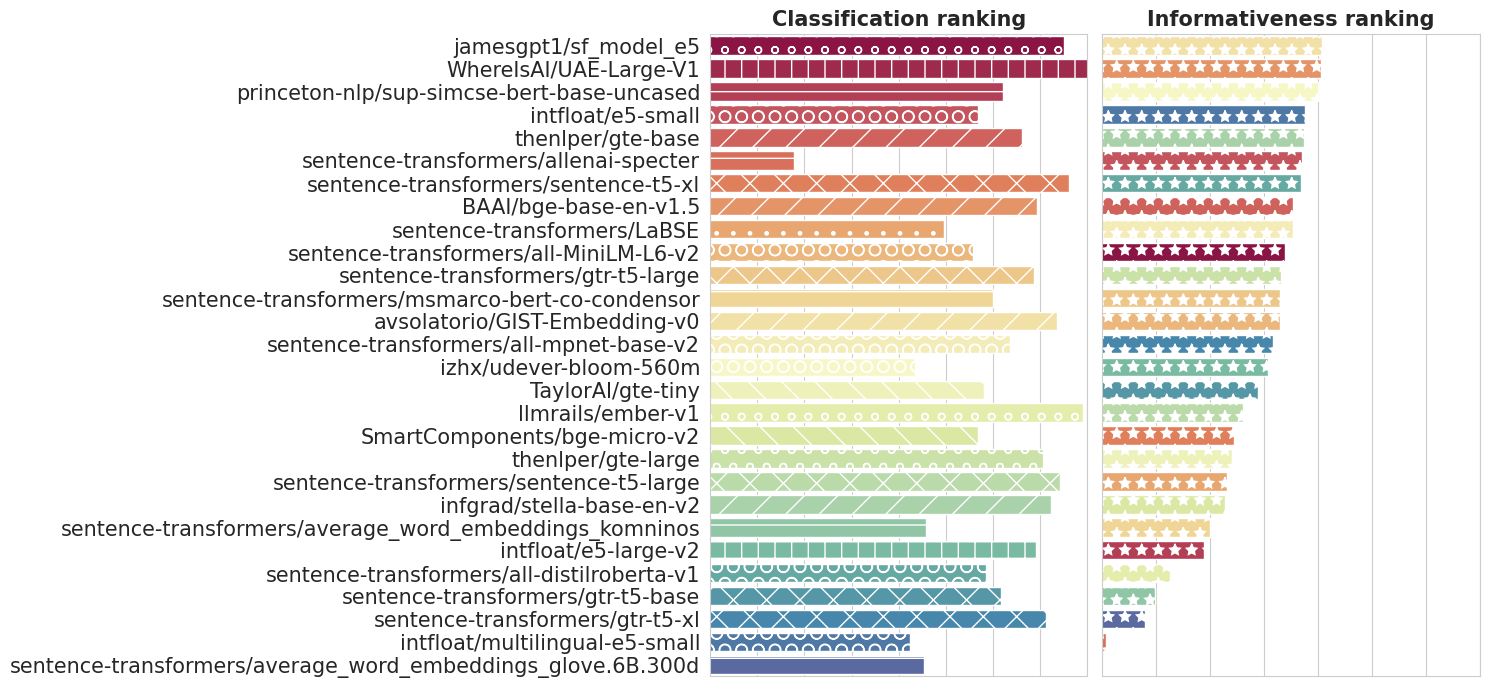

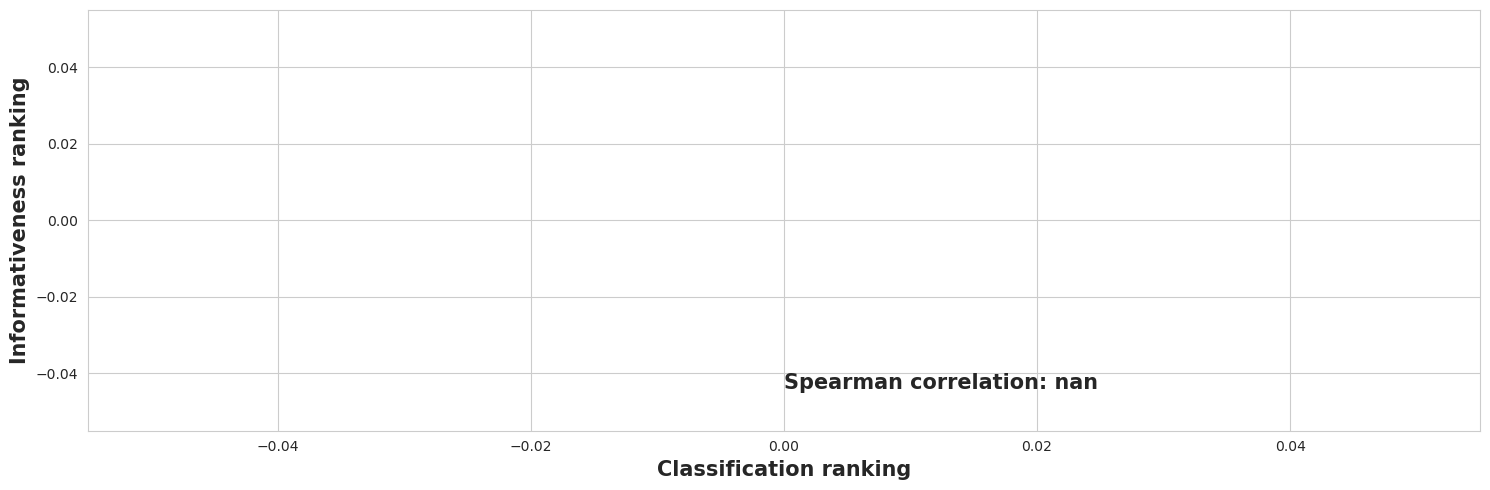

In [18]:


toplot_info = ranking[ranking['ranking'] ==  "informativeness"]
toplot_classif = ranking[ranking['ranking'] ==  "classification"]



# rank both according to toplot_info value
toplot_info = toplot_info.sort_values(by="value", ascending=False)
info_models = toplot_info['model'].values
classifs_models = toplot_classif['model'].values

# make intersection
info_models = set(info_models)
classifs_models = set(classifs_models)
models = info_models.intersection(classifs_models)

toplot_classif = toplot_classif.set_index('model').loc[models].reset_index()
toplot_info = toplot_info[toplot_info['model'].isin(models)]

spectral_cmap = sns.color_palette("Spectral", as_cmap=True)
model_colors = {m : k for k, m in enumerate(models)}
# normalize colors
model_colors = {m: spectral_cmap(k / len(model_colors)) for m, k in model_colors.items()}

toplot_info['color'] = toplot_info['model'].map(model_colors)
toplot_classif['color'] = toplot_classif['model'].map(model_colors)


# make ranked bar plot
fig, ax = plt.subplot_mosaic([['ranking_classif', 'ranking_informativeness']], sharey=False, sharex=False, figsize=(15, 7))

# horizontal bar plot, with shared y axis
# share y axis

hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*']

sns.barplot(data=toplot_info, y="model", x="value", ax=ax['ranking_informativeness'], orient='h', palette=model_colors, hue="model")
for i, bar in enumerate(ax['ranking_informativeness'].patches):
    # hatche based on community
    bar.set_hatch(hatches[toplot_info.iloc[i]['community']])

# set xlim
ax['ranking_informativeness'].set_xlim(0.3, 0.65)

sns.barplot(data=toplot_classif, y="model", x="value", ax=ax['ranking_classif'], orient='h', hue="model", palette=model_colors)

for i, bar in enumerate(ax['ranking_classif'].patches):
    # hatche based on community
    bar.set_hatch(hatches[toplot_classif.iloc[i]['community']])

# set xlim
ax['ranking_classif'].set_xlim(0.5, 0.7)

# share y axis:
ax['ranking_informativeness'].sharey(ax['ranking_classif'])
ax['ranking_informativeness'].tick_params(labelleft=False)
ax['ranking_informativeness'].set_ylabel("")

# make yticks bigger
ax['ranking_classif'].tick_params(axis='y', labelsize=15)

# remove xticks
ax['ranking_classif'].tick_params(labelbottom=False)
ax['ranking_classif'].set_xlabel("")
ax['ranking_informativeness'].tick_params(labelbottom=False)
ax['ranking_informativeness'].set_xlabel("")

# remvoe ylabels
ax['ranking_classif'].set_ylabel("")

# set titles
ax['ranking_classif'].set_title("Classification ranking", fontsize=15, fontweight='bold')
ax['ranking_informativeness'].set_title("Informativeness ranking", fontsize=15, fontweight='bold')




fig.tight_layout()
path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/nlp_models_rankings_{sanitize_metric_name(METRIC)}.png")
# make sure the folder exists
path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(path, bbox_inches='tight', dpi=300)

######## 

# deduplicate the ranking


ranking_pivot = ranking.pivot(columns="ranking", values="rank", index=['model', 'community']).reset_index()
# remove community -1
ranking_pivot = ranking_pivot[ranking_pivot['community'] != -1]
ranking_pivot['community'] = ranking_pivot['community'].astype(str)

# sort
ranking_pivot = ranking_pivot.sort_values(by="community")

# rename model and community
ranking_pivot = ranking_pivot.rename(columns={'model': 'Model', 'community': 'Community', 'classification': 'Classification', 'informativeness': 'Informativeness'})

fig, ax = plt.subplots(figsize=(15, 5))

display(ranking_pivot)

g = sns.scatterplot(data=ranking_pivot, x="Classification", y="Informativeness", style="Community", hue="Model", s=600, ax=ax, legend=False, palette=model_colors)
# plot linear regression
sns.regplot(data=ranking_pivot, x="Classification", y="Informativeness", scatter=False, ax=ax)
# annotate with correlation
correlation = ranking_pivot['Classification'].corr(ranking_pivot['Informativeness'])
ax.annotate(f"Spearman correlation: {correlation:.2f}", xy=(0.5, 0.1), xycoords='axes fraction', fontsize=15, fontweight='bold')

# make labels bigger and bold and rename in model X and model Y
ax.set_xlabel("Classification ranking", fontsize=15, fontweight='bold')
ax.set_ylabel("Informativeness ranking", fontsize=15, fontweight='bold')


fig.tight_layout()
path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/nlp_models_ranking_correlation_{sanitize_metric_name(METRIC)}.png")
# make sure the folder exists
path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(path, bbox_inches='tight', dpi=300)








No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


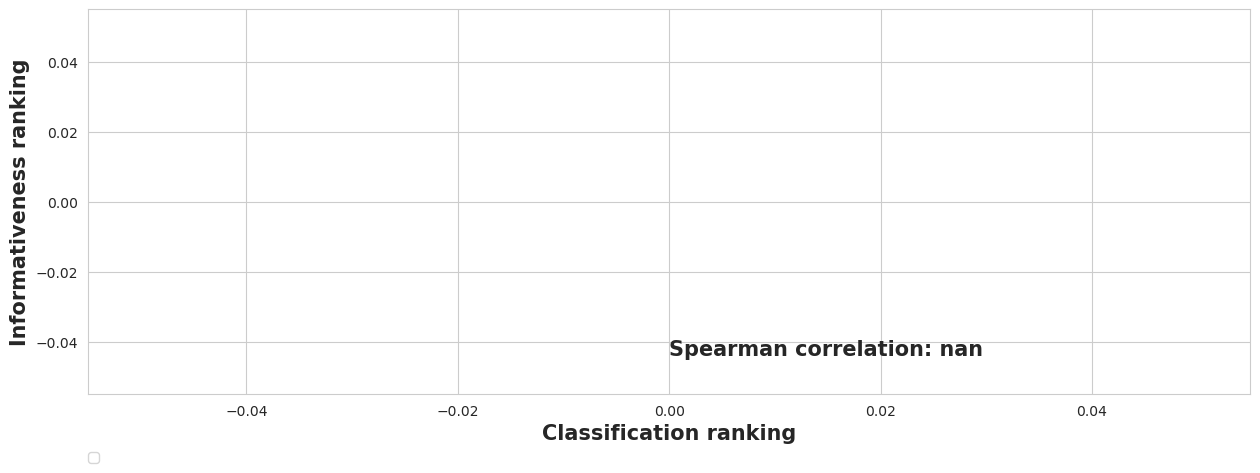

In [19]:
# pivot the table
ranking_pivot = ranking.pivot(columns="ranking", values="rank", index=['model', 'community']).reset_index()
# remove community -1
ranking_pivot = ranking_pivot[ranking_pivot['community'] != -1]

ranking_pivot['community'] = ranking_pivot['community'].astype(str)


# sort
ranking_pivot = ranking_pivot.sort_values(by="community")

# rename model and community
ranking_pivot = ranking_pivot.rename(columns={'model': 'Model', 'community': 'Community', 'classification': 'Classification', 'informativeness': 'Informativeness'})

fig, ax = plt.subplots(figsize=(15, 5))
g = sns.scatterplot(data=ranking_pivot, x="Classification", y="Informativeness", style="Community", hue="Model", s=600, ax=ax)

# plot linear regression
sns.regplot(data=ranking_pivot, x="Classification", y="Informativeness", scatter=False, ax=ax)
# annotate with correlation
correlation = ranking_pivot['Classification'].corr(ranking_pivot['Informativeness'])
ax.annotate(f"Spearman correlation: {correlation:.2f}", xy=(0.5, 0.1), xycoords='axes fraction', fontsize=15, fontweight='bold')



# legend outside with 2 columns, below the plot
plt.legend(bbox_to_anchor=(.0, -0.15), loc=2, borderaxespad=0., ncol=3)

# rename x and y labels and make bold and bigger

ax.set_xlabel("Classification ranking", fontsize=15, fontweight='bold')
ax.set_ylabel("Informativeness ranking", fontsize=15, fontweight='bold')


# save the figure
path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/nlp_models_ranking_correlation_{sanitize_metric_name(METRIC)}_legend.png")
# make sure the folder exists
path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(path, bbox_inches='tight', dpi=300)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


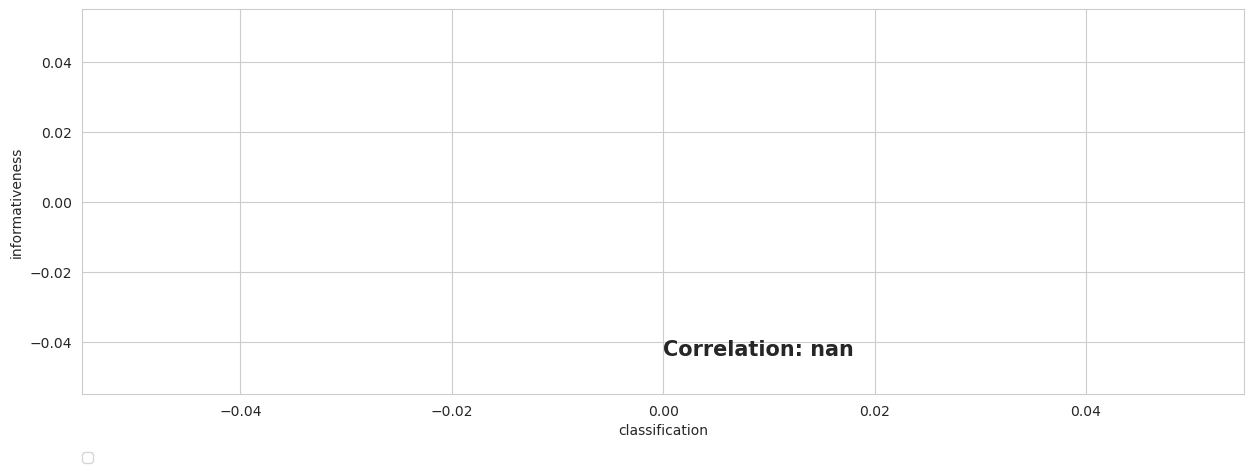

In [20]:

# pivot the table

fig, ax = plt.subplots(figsize=(15, 5))

ranking_pivot = ranking.pivot(columns="ranking", values="value", index=['model', 'community']).reset_index()

sns.scatterplot(data=ranking_pivot, x="classification", y="informativeness", style="community", hue="model", s=200, ax=ax)

# plot linear regression
sns.regplot(data=ranking_pivot, x="classification", y="informativeness", scatter=False, ax=ax)
# annotate with correlation
correlation = ranking_pivot['classification'].corr(ranking_pivot['informativeness'])
ax.annotate(f"Correlation: {correlation:.2f}", xy=(0.5, 0.1), xycoords='axes fraction', fontsize=15, fontweight='bold')

# legend outside

plt.legend(bbox_to_anchor=(.0, -0.15), loc=2, borderaxespad=0., ncol=3)
path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/nlp_models_acc_info_correlation_{sanitize_metric_name(METRIC)}.png")
# make sure the folder exists
path.parent.mkdir(parents=True, exist_ok=True)
fig.savefig(path, bbox_inches='tight', dpi=300)




/tmp/ipykernel_77679/841220216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toplot['community'] = toplot['community'].astype(str)


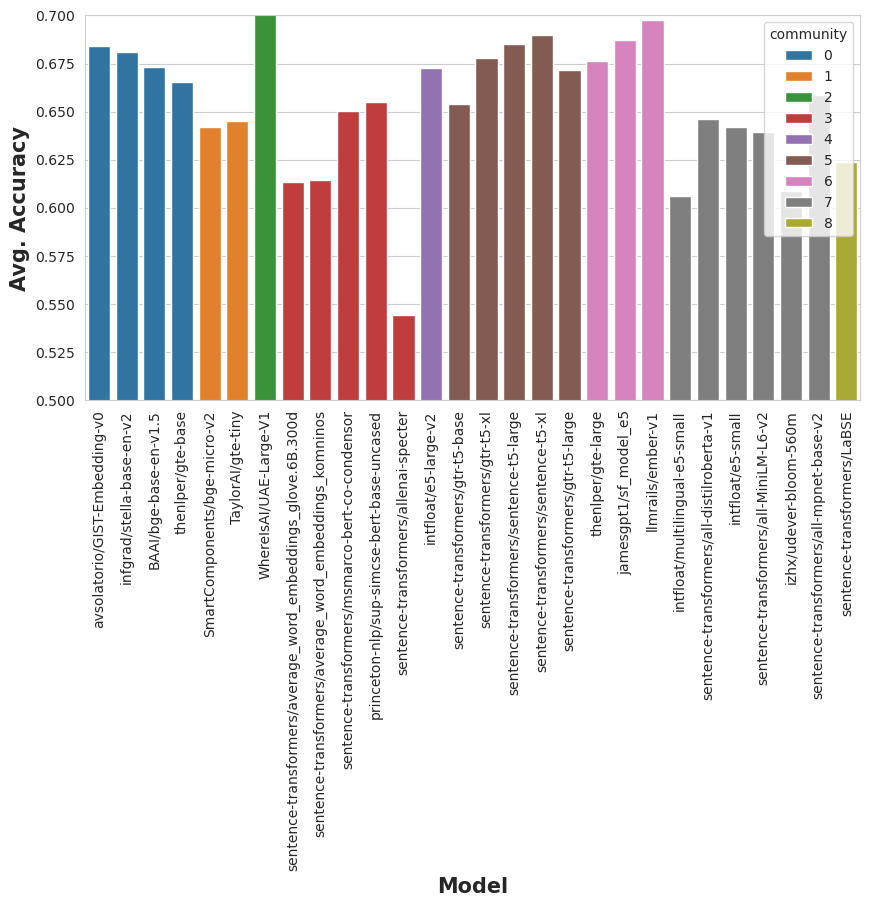

In [21]:
toplot = ranking[ranking['ranking'] ==  "classification"]
toplot['community'] = toplot['community'].astype(str)
# remove community -1
toplot = toplot[toplot['community'] != "-1"]
fig, ax = plt.subplots(figsize=(10, 5))
toplot = toplot.sort_values(by="community")
sns.barplot(data=toplot, x="model", y="value", ax=ax, hue="community")
# rotate x labels
plt.xticks(rotation=90)
plt.ylim(0.5, 0.7)

# rename x and y labels and make bold and bigger
plt.xlabel("Model", fontsize=15, fontweight='bold')
plt.ylabel("Avg. Accuracy", fontsize=15, fontweight='bold')

path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/classifs_perfs_per_community_{sanitize_metric_name(METRIC)}.png")

In [22]:
## Classification clustering

In [23]:
full_classification = pd.read_csv('exported_data/classification_full.csv')

full_classification = full_classification[~full_classification['dataset'].str.contains('clinc') ]

In [24]:

# add community to the classification
full_classification['community'] = full_classification['model'].apply(lambda x: str(node_to_community[x]) if x in node_to_community else -1)
# remove if community is -1
full_classification = full_classification[full_classification['community'] != -1]

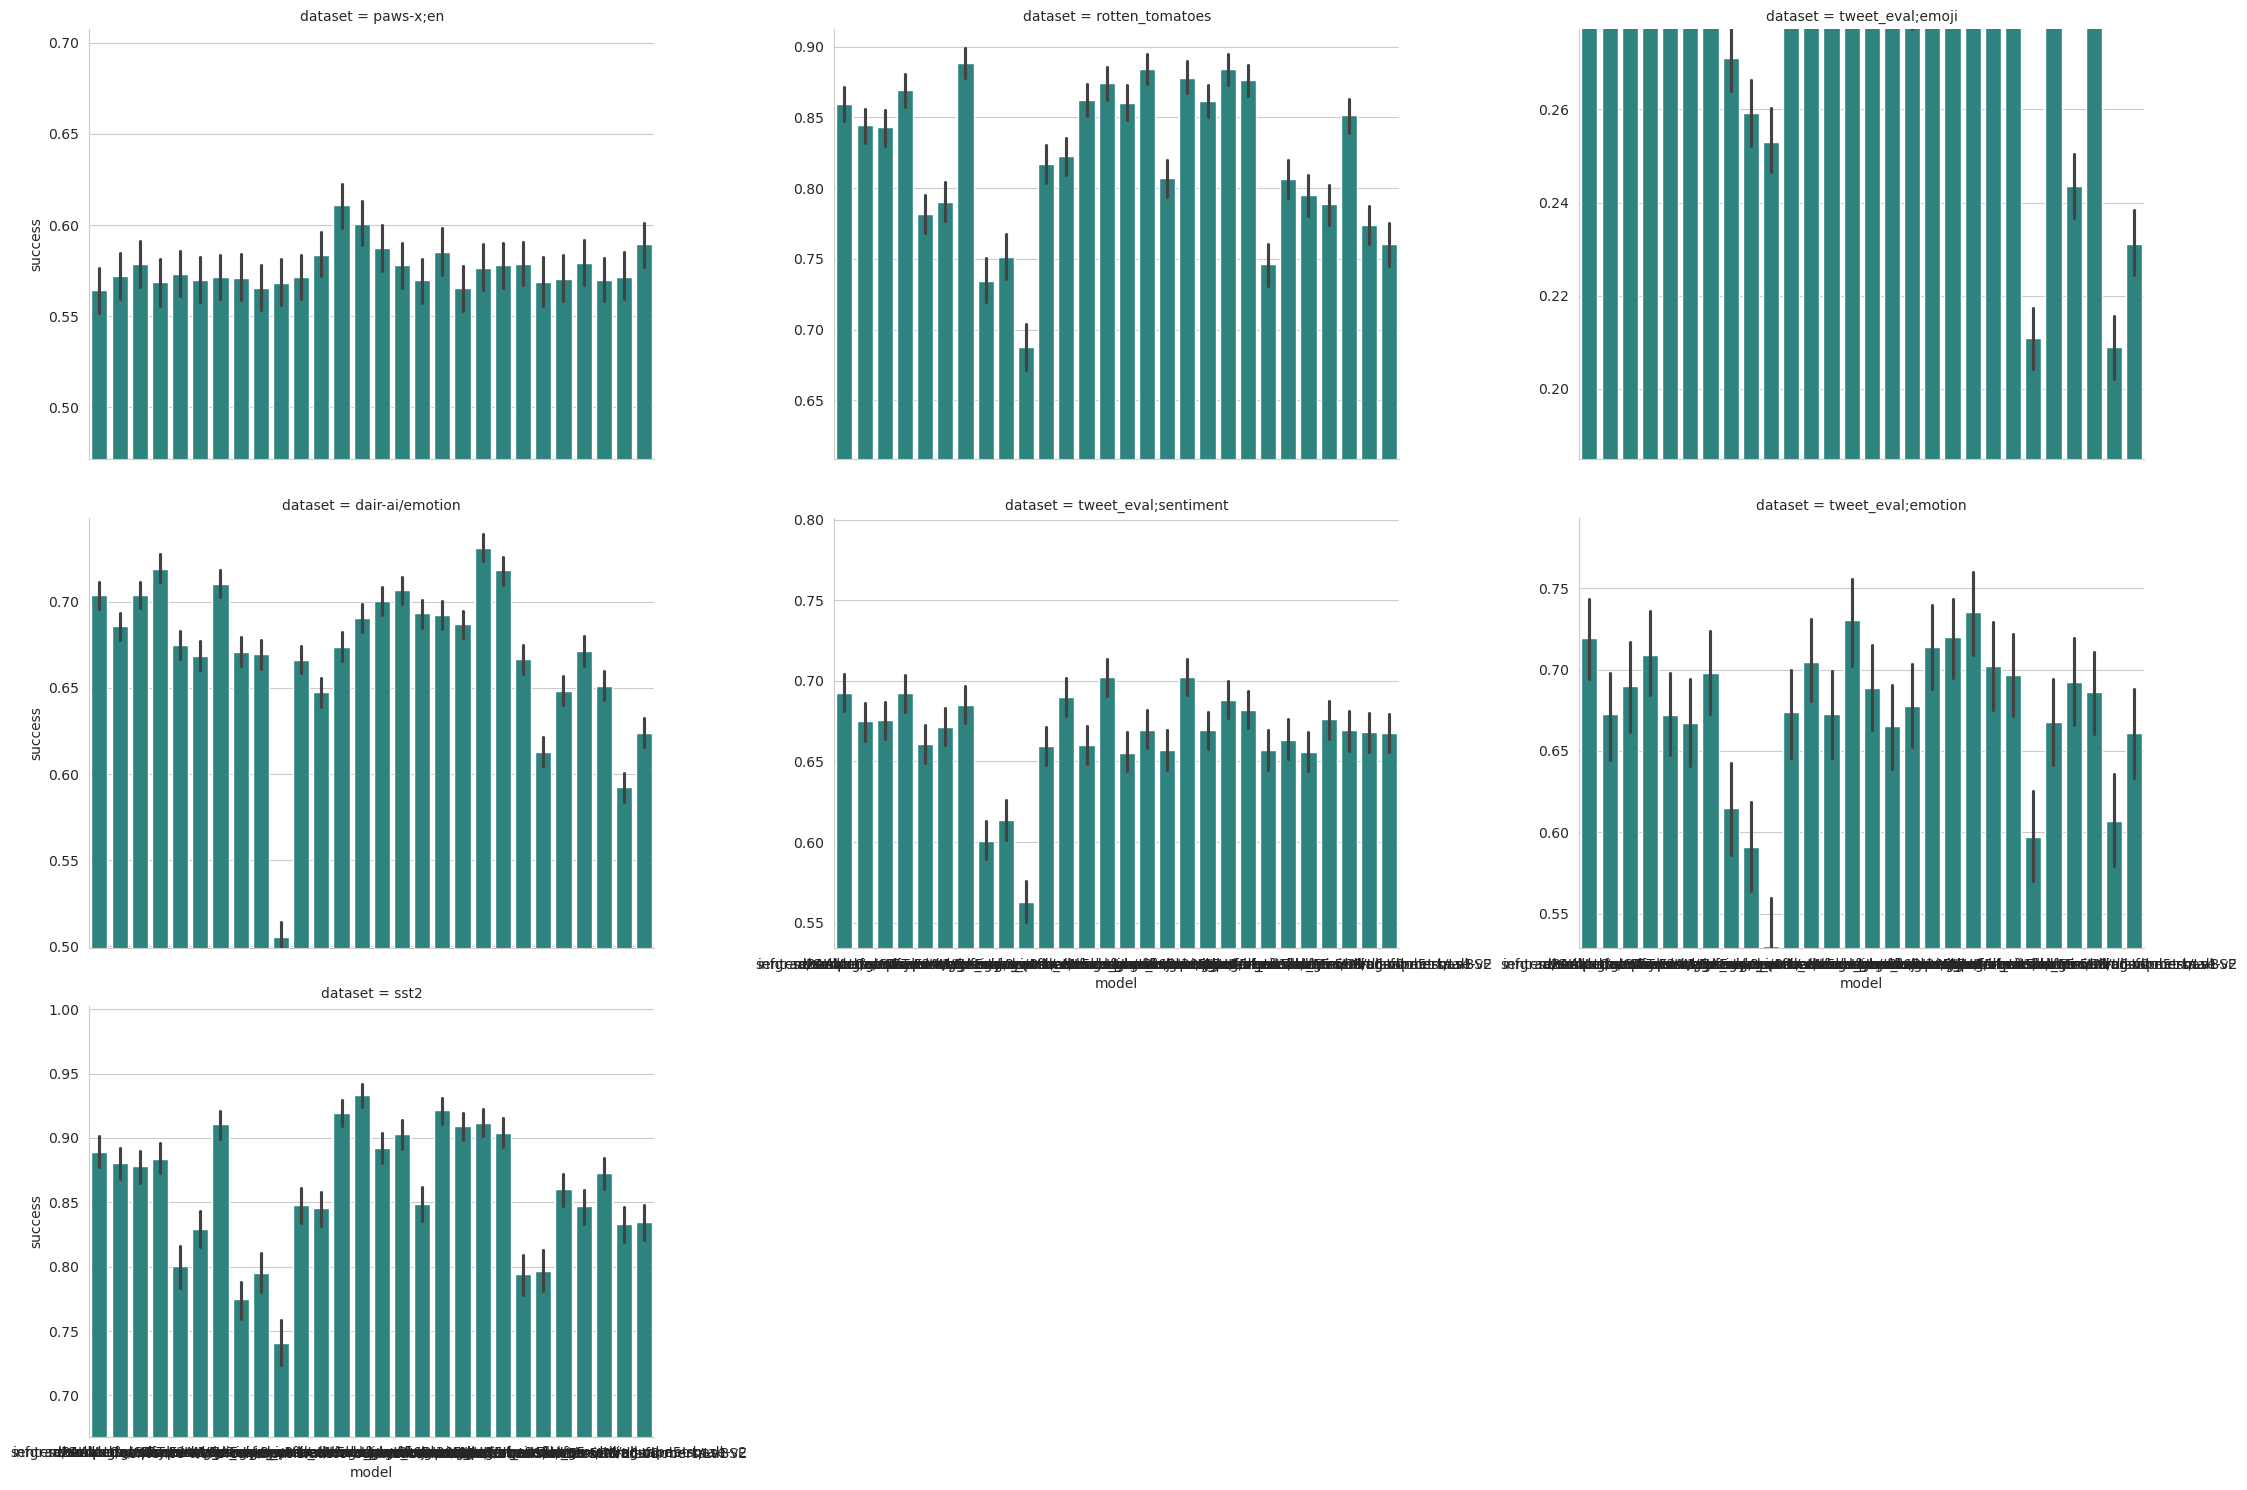

In [25]:


toplot = full_classification.sort_values("community")
# g = sns.catplot(data=toplot, x="model", y="success", hue="community", col="dataset", kind="bar", col_wrap=3, height=5, aspect=1.5, palette="Spectral", sharey=False)

g = sns.FacetGrid(data=toplot, hue="community", col="dataset", col_wrap=3, height=5, aspect=1.5, sharey=False)


# custom function to map
def barplot(x, y, **kwargs):
    data = kwargs.pop('data')
    hue = kwargs.get('hue')
    label = kwargs.pop('label')
    
    sns.barplot(x=x, y=y, data=data, ax=plt.gca(), palette="viridis", **kwargs)
    
    grouped = data.groupby([x, hue])[y].mean()
    mmin, mmax = grouped.min().min(), grouped.max().max()
    ax = plt.gca()
    ax.set_ylim(0.8*mmin, 1.2*mmax)

    
g.map_dataframe(barplot, x="model", y="success", hue="community")


    
    


# make each ylim 0.9*min, 1.1*max

    
    

In [26]:


# load mteb data

mteb = pd.read_csv('exported_data/df_mteb_avg.csv')
mteb

FileNotFoundError: [Errno 2] No such file or directory: 'exported_data/df_mteb_avg.csv'

In [ ]:
mteb

import re

def extract_url_from_html_link(html):
    return re.findall(r'href=[\'"]?([^\'" >]+)', html)[0]


mteb['model'] = mteb['Model'].apply(extract_url_from_html_link).apply(lambda x: "/".join(x.split('/')[-2:]))


In [ ]:

avg_results = table.mean(axis=1).sort_values(ascending=False).to_frame().reset_index().rename(columns={0: METRIC, 'model_1': 'model'}).merge(mteb, on='model', how='left').sort_values(METRIC, ascending=False)

# remove unnamed columns
avg_results = avg_results.loc[:, ~avg_results.columns.str.contains('^Unnamed')]



In [ ]:

print(list(avg_results.columns))

METRICS = ['Average (56 datasets)', 'Classification Average (12 datasets)', 'Clustering Average (11 datasets)', 'Reranking Average (4 datasets)', 'Retrieval Average (15 datasets)', 'STS Average (10 datasets)'] + [METRIC]

METADATA = ['model', 'Rank', 'Model', 'Model Size (GB)', 'Embedding Dimensions', 'Max Tokens']

In [ ]:

sns.heatmap(avg_results[METRICS].corr(), annot=True, cmap='coolwarm')

In [ ]:
# melt
avg_results_pivot = avg_results.melt(id_vars=METADATA+[METRIC], value_vars=set(METRICS)-set(METRIC), var_name="Metric", value_name="Accuracy")
# remove metric about summarization


avg_results_pivot["Community"] = avg_results_pivot['model'].map(node_to_community)

# sns.relplot(data=avg_results_pivot, x=METRIC, y="Value", col="Metric", kind="scatter", col_wrap=3, height=10, aspect=1.5, hue="model", facet_kws={'sharey': False, 'sharex': False}, s=500)

g = sns.FacetGrid(data=avg_results_pivot, col="Metric", col_wrap=3, height=5, aspect=1.5, sharey=False, sharex=False)

def scatterplot_relplot(x, y, **kwargs):
    data = kwargs.pop('data')
    sns.scatterplot(x=x, y=y, data=data, ax=plt.gca(), **kwargs)
    # regplot
    sns.regplot(x=x, y=y, data=data, scatter=False, ax=plt.gca())
    
    # annotate with correlation
    correlation = data[x].corr(data[y])
    ax = plt.gca()
    ax.annotate(f"Correlation: {correlation:.2f}", xy=(0.5, 0.1), xycoords='axes fraction', fontsize=15, fontweight='bold')
    
g.map_dataframe(scatterplot_relplot, x=METRIC, y="Accuracy", hue="model", s=500, palette=model_colors, style="Community")

# change title template 
g.set_titles(template="{col_name}", size=15, fontweight='bold')

# make x and y labels bigger and bold
g.set_xlabels(METRIC, fontsize=15, fontweight='bold')
g.set_ylabels("Accuracy", fontsize=15, fontweight='bold')

path = Path(f"../../../papers/emir-embedding-comparison/fig/nlp/mteb_correlation_{sanitize_metric_name(METRIC)}.png")
# make sure the folder exists
path.parent.mkdir(parents=True, exist_ok=True)
g.savefig(path, bbox_inches='tight', dpi=300)

In [ ]:

# Correlation between metric and embedding dimensions
sns.scatterplot(data=avg_results, x=METRIC, y="Embedding Dimensions", hue="model", s=500, legend=False)


In [ ]:
# Make metadata table


metadata_table = avg_results.copy()[METADATA+METRICS]

metadata_table = metadata_table.drop(["Model", "Rank"], axis=1).rename(columns={'model': 'Model'})
metadata_table = metadata_table.set_index('Model')
metadata_table['Embedding Dimensions'] = df.groupby('model_2')['d_2'].first()

# rename I(X_1->X_2)/d_2 to Informativeness

metadata_table = metadata_table.rename(columns={METRIC: "Info."})
metadata_table = metadata_table.rename(columns={'Average (56 datasets)': 'Average', 'Classification Average (12 datasets)': 'Classification', 'Clustering Average (11 datasets)': 'Clustering', 'Reranking Average (4 datasets)': 'Reranking', 'Retrieval Average (15 datasets)': 'Retrieval', 'STS Average (10 datasets)': 'STS', "Embedding Dimensions": "Dim.", "Model Size (GB)" : "Size (GB)", "Max Tokens": "Max Tokens"})

# make \\url with hugginface url and model name
metadata_table = metadata_table.reset_index()
metadata_table['Model'] = metadata_table['Model'].apply(lambda x: x.replace('_', r'\_')).apply(lambda x: "\\href{https://huggingface.co/" + x + "}" + "{" + x + "}")
metadata_table = metadata_table.set_index('Model')

style = metadata_table.style.format({'Model Size (GB)': "{:.2f}", 'Embedding Dimensions': "{:.0f}",  "Max Tokens": "{:.0f}", "Info." : "{:.2f}", 'Average': "{:.2f}", 'Classification': "{:.2f}", 'Clustering': "{:.2f}", 'Reranking': "{:.2f}", 'Retrieval': "{:.2f}", 'STS': "{:.2f}", 'Dim.': "{:.0f}", 'Size (GB)': "{:.2f}", 'Max Tokens': "{:.0f}"}, na_rep="N/A")

# make Info. bold
style = style.set_properties(subset=["Info."], **{"bfseries" :""})

# escape
style = style.format_index()

path = Path(f"../../../papers/emir-embedding-comparison/tables/nlp/mteb_metadata_table_{sanitize_metric_name(METRIC)}.tex")
path.parent.mkdir(parents=True, exist_ok=True)
latex = style.to_latex(clines="skip-last;data", sparse_index=True, caption="Summary of the evaluated embedders with their performance on the MTEB benchmark along with their informativeness.", label="tab:nlp_metadata_table", hrules=True)

# add resizebox to the latex
latex = latex.replace("\\begin{tabular}", "\\resizebox{\\textwidth}{!}{ \\begin{tabular}")
latex = latex.replace("\\end{tabular}", "\\end{tabular}\n}")

# save the latex
path.write_text(latex)


In [ ]:

# ['llmrails/ember-v1', 'jamesgpt1/sf_model_e5', 'infgrad/stella-base-en-v2', 'WhereIsAI/UAE-Large-V1', 'avsolatorio/GIST-Embedding-v0', 'BAAI/bge-base-en-v1.5', 'thenlper/gte-base', 'thenlper/gte-large', 'intfloat/e5-large-v2', 'sentence-transformers/gtr-t5-large', 'sentence-transformers/gtr-t5-xl', 'sentence-transformers/sentence-t5-large', 'sentence-transformers/gtr-t5-base', 'sentence-transformers/sentence-t5-xl', 'TaylorAI/gte-tiny', 'SmartComponents/bge-micro-v2', 'intfloat/e5-small', 'sentence-transformers/msmarco-bert-co-condensor', 'intfloat/multilingual-e5-small', 'sentence-transformers/all-distilroberta-v1', 'princeton-nlp/sup-simcse-bert-base-uncased', 'sentence-transformers/all-MiniLM-L6-v2', 'sentence-transformers/all-mpnet-base-v2', 'izhx/udever-bloom-560m', 'sentence-transformers/LaBSE', 'sentence-transformers/average_word_embeddings_komninos', 'sentence-transformers/average_word_embeddings_glove.6B.300d', 'sentence-transformers/allenai-specter']

# dict model name to citation name

model_citation = {
    'llmrails/ember-v1': 'EMBER',
    'jamesgpt1/sf_model_e5': 'SF-Model',
    'infgrad/stella-base-en-v2': 'STELLA',
    'WhereIsAI/UAE-Large-V1': 'UAE-Large',
    'avsolatorio/GIST-Embedding-v0': 'GIST',
    'BAAI/bge-base-en-v1.5': 'BGE-Base',
    'thenlper/gte-base': 'GTE-Base',
    'thenlper/gte-large': 'GTE-Large',
    'intfloat/e5-large-v2': 'E5-Large',
    'sentence-transformers/gtr-t5-large': 'GTR-T5-Large',
    'sentence-transformers/gtr-t5-xl': 'GTR-T5-XL',
    'sentence-transformers/sentence-t5-large': 'Sentence-T5-Large',
    'sentence-transformers/gtr-t5-base': 'GTR-T5-Base',
    'sentence-transformers/sentence-t5-xl': 'Sentence-T5-XL',
    'TaylorAI/gte-tiny': 'GTE-Tiny',
    'SmartComponents/bge-micro-v2': 'BGE-Micro',
    'intfloat/e5-small': 'E5-Small',
    'sentence-transformers/msmarco-bert-co-condensor': 'MSMARCO-BERT',
    'intfloat/multilingual-e5-small': 'Multilingual-E5-Small',
    'sentence-transformers/all-distilroberta-v1': 'DistilRoBERTa',
    'princeton-nlp/sup-simcse-bert-base-uncased': 'SimCSE',
    'sentence-transformers/all-MiniLM-L6-v2': 'MiniLM-L6',
    'sentence-transformers/all-mpnet-base-v2': 'MPNet-Base',
    'izhx/udever-bloom-560m': 'UDEVER-Bloom',
    'sentence-transformers/LaBSE': 'LaBSE',
    'sentence-transformers/average_word_embeddings_komninos': 'Komninos',
    'sentence-transformers/average_word_embeddings_glove.6B.300d': 'GloVe',
    'sentence-transformers/all

